<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/%D0%93%D1%83%D1%80%D0%B2%D0%B8%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# критерий гурвица

In [ ]:
import numpy as np
import sys

def create_hurwitz_matrix(coefficients):
    k = 0
    matrix = []
    for _ in range(0, len(coefficients)-1):
        column = []
        for d in range(0, len(coefficients)-1):
            if 2*d+1-k < 0:
                column.append(0)
            else:
                try:
                    column.append(coefficients[2*d+1-k])
                except IndexError:
                    column.append(0)
            d += 1
        matrix.append(column)
        k += 1
    return np.array(matrix)

#def check_matrix_determinant(matrix):
#   check if the matrix denominator renders the system unstable or marginally
#   stable

def create_minor(matrix, row, column):
    # removes the i-th row and the j-th column
    return matrix[
        np.array(list(range(row)) +
                 list(range(row+1, matrix.shape[0])))[:,np.newaxis],
        np.array(list(range(column)) +
                 list(range(column+1, matrix.shape[1])))]

def check_stability(hurwitz_matrix, coefficients):
    print(hurwitz_matrix)
    print("Определитель матрицы =: "+
          str(np.linalg.det(hurwitz_matrix)))
    if np.linalg.det(hurwitz_matrix) > 0:
        print("Determinant of the hurwitz matrix is greater than zero")
    elif np.linalg.det(hurwitz_matrix) == 0:
        print("Система с предельной устойчивостью")
    else:
        return("Нестабильная система")

    for _ in range(0, len(coefficients)-2):
        x,y = hurwitz_matrix.shape
        hurwitz_matrix= create_minor(hurwitz_matrix, x-1, y-1)
        print(hurwitz_matrix)
        print("Определитель матрицы: " +
              str(np.linalg.det(hurwitz_matrix)))
        if np.linalg.det(hurwitz_matrix) > 0:
            continue
        elif np.linalg.det(hurwitz_matrix) == 0:
            print("Система с предельной устойчивостью")
            continue
        else:
            return("Нестабильная система")
    return("Полностью стабильная система")

print("Характеристическое уравнение: ")
print("a0*s^n + a1*s^(n-1) + ... + a(n-1)*s + an")
print("Введите степень полинома:")
degree = int(input('Степень полинома = : '))
coefficients = []
for x in range (0, degree+1):
    coefficient = int(input(str('Введите коэффициент '+ 'a' + str(x) + ": ")))
    coefficients.append(int(coefficient))
print(coefficients)
print("Для стабильности системы все определители Гурвица должны быть больше нуля")
matrix=create_hurwitz_matrix(coefficients)

print('Матрица гурвица: \n')
newmatrix=matrix
print(check_stability(newmatrix, coefficients))

Характеристическое уравнение: 
a0*s^n + a1*s^(n-1) + ... + a(n-1)*s + an
Введите степень полинома:
Степень полинома = : 4
Введите коэффициент a0: 1
Введите коэффициент a1: 3
Введите коэффициент a2: 3
Введите коэффициент a3: 3
Введите коэффициент a4: 2
[1, 3, 3, 3, 2]
Для стабильности системы все определители Гурвица должны быть больше нуля
Матрица гурвица: 

[[3 3 0 0]
 [1 3 2 0]
 [0 3 3 0]
 [0 1 3 2]]
Определитель матрицы =: 0.0
Система с предельной устойчивостью
[[3 3 0]
 [1 3 2]
 [0 3 3]]
Определитель матрицы: 0.0
Система с предельной устойчивостью
[[3 3]
 [1 3]]
Определитель матрицы: 6.0
[[3]]
Определитель матрицы: 3.0000000000000004
Полностью стабильная система


# теория



Системы управления используются для управления поведением любой динамической системы. Они предоставляют точную информацию о динамической системе, чтобы она могла хорошо работать. Одним из важных аспектов системы управления является СТАБИЛЬНОСТЬ. Устойчивость системы важна для получения желаемого результата от системы. В этой статье мы рассмотрим, как анализ системы управления помогает обеспечить устойчивость системы. Мы также изучим типы устойчивости, приложения и многое другое.


Устойчивость системы означает, что когда управляемый вход предоставляется любой динамической системе, это должно привести к предоставлению управляемого выхода. Другими словами, система должна быть BIBO-устойчивой, т.е. системой с ограниченным входом и ограниченным выходом. Если система не находится под нашим контролем, т.е. при предоставлении ограниченного входа получается неконтролируемый выход, то говорят, что система неустойчива.

Единица-шаг-сигнал
Сигнал единичного шага (ограниченный сигнал)

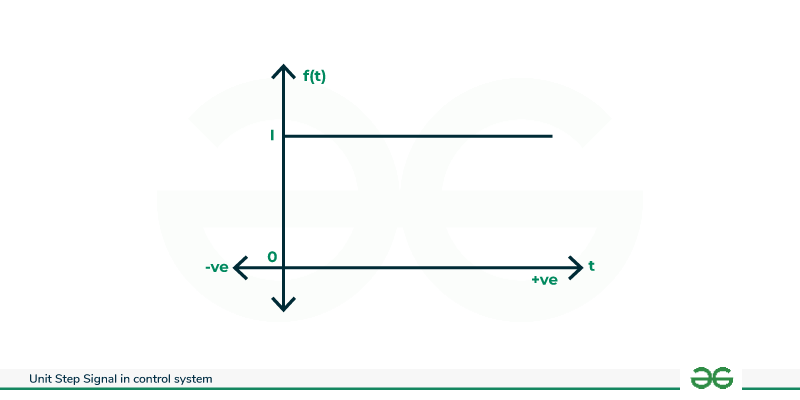

На изображении выше показан сигнал единичного шага, который является примером ограниченного сигнала. Когда значение времени (t) на оси x увеличивается, выходное значение остается равным 1. Это показывает, что сигнал выше стабилен.

Непрерывный-временной-единичный-линейный-сигнал
Функция рампы (неограниченный сигнал)
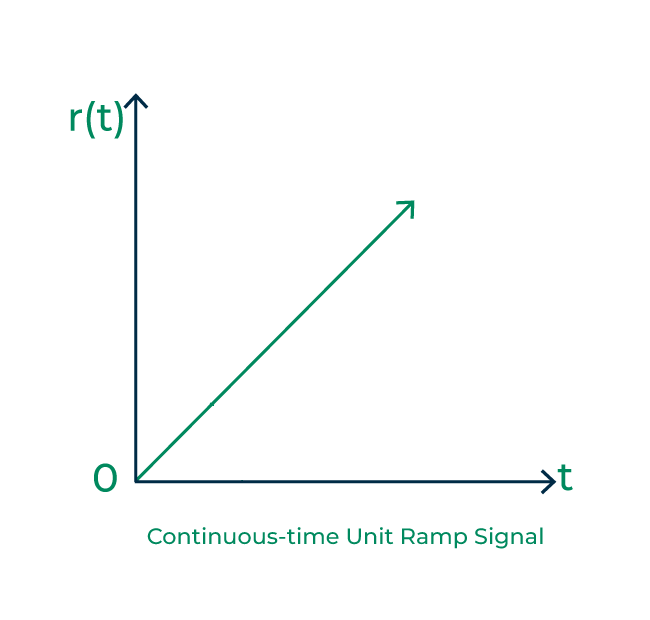
На изображении выше показан сигнал единичной рампы, который является примером неограниченного сигнала. Когда значение времени (t) на оси x увеличивается, выходное значение непрерывно увеличивается. Это показывает, что сигнал выше нестабилен.

Типы стабильности
Существует 3 типа устойчивости:

Устойчивость устойчивого состояния
Переходная устойчивость
Стабильность БИБО
Устойчивость устойчивого состояния
Устойчивая устойчивость означает, что когда система подвергается постоянному входу в течение длительного периода времени и система выдает стабильный выход, это известно как установившаяся устойчивость. Когда динамическая система обеспечивает стабильный выход при любом возмущении на входе, она называется устойчивой системой.

Переходная устойчивость
Когда система меняет свое состояние, это называется переходом. В течение переходного периода то, является ли система стабильной или нет, подвергаясь некоторому возмущению, определяется переходной устойчивостью.

Стабильность БИБО
Ограниченная входная и ограниченная выходная устойчивость показывают, что система устойчива, когда система возвращает ограниченный выходной сигнал при заданном ограниченном входном сигнале. Когда выходной сигнал управляем, система устойчива, в противном случае она неустойчива.



Типы систем, основанные на устойчивости
Существует 3 типа систем по устойчивости:

Полностью стабильная система
Система с предельной стабильностью
Условно стабильная система
Нестабильная система
Полностью стабильная система
Как следует из названия, полностью стабильная система обеспечивает стабильный выход для всех диапазонов значений. Один из способов определить полностью стабильную систему — проверить полюса передаточной функции. Если полюса разомкнутой и замкнутой системы лежат в левой половине s-плоскости, то система полностью стабильна.

Приведенный ниже график показывает полностью стабильную систему.

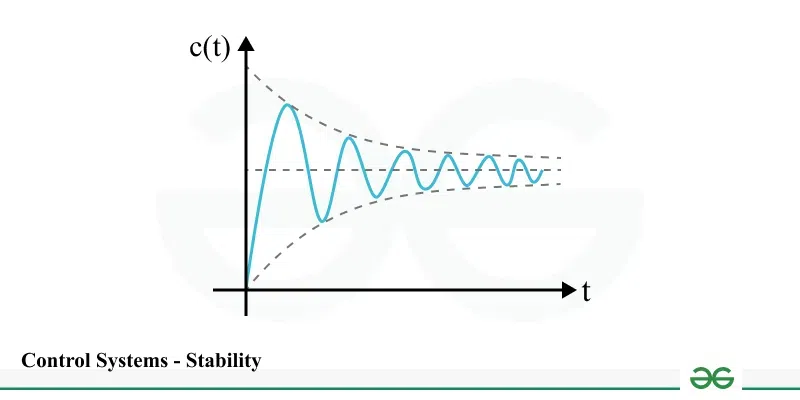Полностью стабильная система
Полностью стабильная система
Система с предельной устойчивостью
Система с предельной устойчивостью — это система, которая является стабильной для текущего или настоящего значения. Любое возмущение на входе может сделать выход системы нестабильным. Система с предельной устойчивостью может быть определена, когда полюса системы с открытым и закрытым контуром лежат на мнимой оси s-плоскости. Приведенный ниже график является примером системы с предельной устойчивостью.



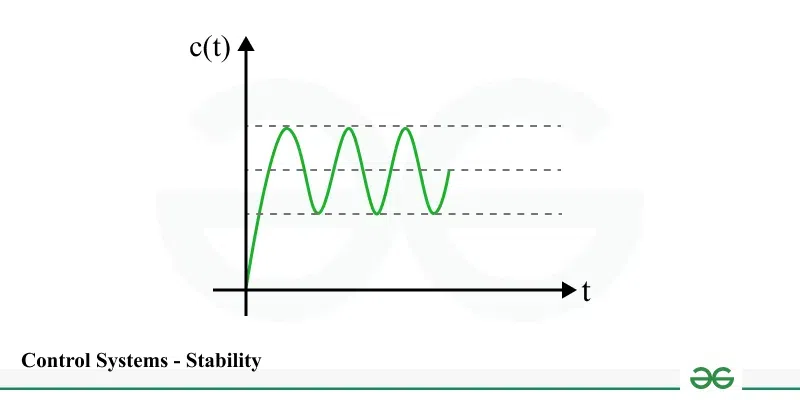
Система с предельной устойчивостью
Условно стабильная система
Когда система стабильна для определенных значений, то она известна как условно стабильная система. Система может стать нестабильной во время переходного процесса. Проще говоря, условно стабильная система стабильна только тогда, когда коэффициент усиления контура системы находится в определенном диапазоне. Изображение, приведенное ниже, показывает условно стабильную систему.

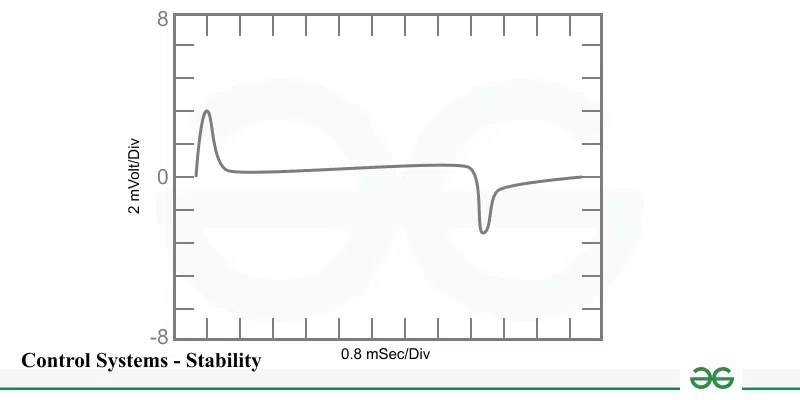
Условно стабильная система
Нестабильная система
Система считается нестабильной, когда она производит неконтролируемый выход. Нестабильную систему можно определить, когда полюса открытого и закрытого контура находятся на правой половине s-плоскости. Приведенный график показывает нестабильную систему.

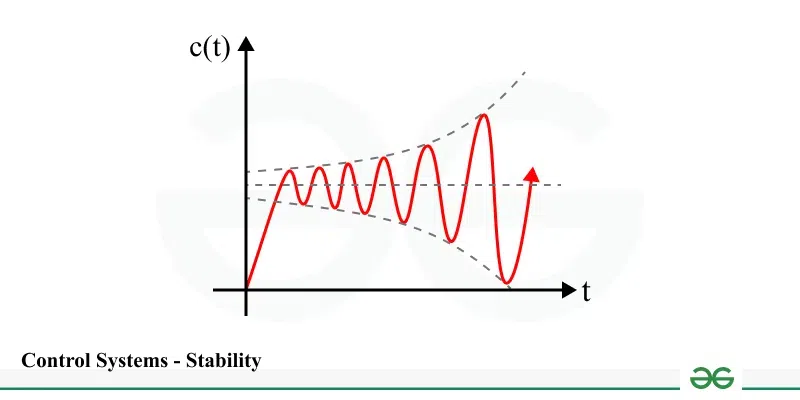
Нестабильная система


Методы анализа устойчивости
Анализ устойчивости в системе управления выполняется с использованием различных методов. Некоторые из важных методов перечислены ниже:

Критерий устойчивости Рауса-Гурвица
Критерий устойчивости Найквиста
Метод корневого локуса
Участок Боде
Критерий устойчивости Рауса-Гурвица
Это математический метод, который используется для определения устойчивости системы LTI. Он предоставляет информацию о корнях в правой половине s-плоскости путем анализа коэффициентов характеристического уравнения системы.

Согласно критерию Рауса-Гурвица, многочлен должен удовлетворять следующим 3 условиям:

Все коэффициенты многочлена должны иметь одинаковый знак.
Все члены в первом столбце матрицы Рауса должны иметь одинаковый знак.
В характеристическом уравнении должна присутствовать вся степень «s».
Если вышеуказанные условия выполняются, то система устойчива, в противном случае она неустойчива.

Пример: Исследовать устойчивость данного уравнения, используя метод Рауса.

с^{3}+4с^{2}+с+16=0

Решение:

Создание массива Рауса:

с3 ||    1 ||    1 ||

с2 ||    4 ||   16 ||

с1 ||   $\frac{(4*1)-(16*1)}{4}=-3$  || 0

с0 ||  $\frac{-3*16}{-3}=16$



При переходе от 4 к -3, а затем от -3 к 16 происходит 2 смены знака. Поскольку происходит 2 смены знака, система нестабильна.

Критерий устойчивости Найквиста
Диаграмма Найквиста — это графическое представление, используемое в технике управления. Она используется для анализа устойчивости и частотной характеристики системы. Этот критерий работает по принципу аргумента. Согласно критерию устойчивости Найквиста, количество окружностей точки (-1, 0) равно времени PZ передаточной функции замкнутого контура. Если количество окружностей направлено против часовой стрелки, то система устойчива.

Уравнение для анализа устойчивости приведено ниже:

Н = З – П



Где,
P = полюс разомкнутого контура системы с правой стороны (RHP)
Z = ноль замкнутого контура системы с правой стороны (RHP)
N = число витков вокруг (-1,0)



Примечание:  «N» отрицательно для обхода против часовой стрелки вокруг (-1,0) и положительно для обхода по часовой стрелке вокруг (-1,0).



Пример: Ниже приведен график Найквиста в терминах «k». Найдите условие «k», при котором система устойчива.

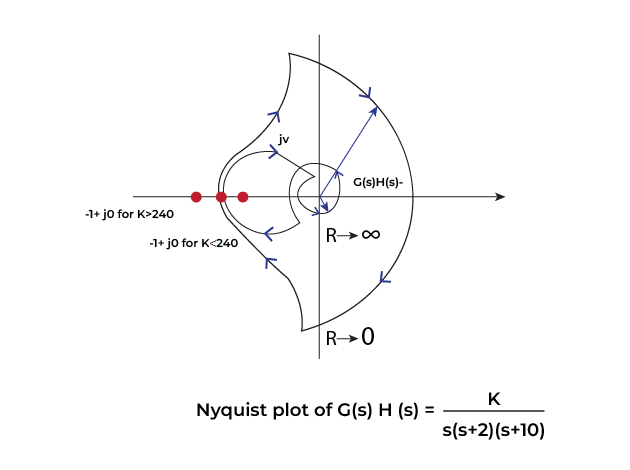
График Найквиста


Решение

Случай 1: Если k< 240

Точка -1+j0 не обведена. Это означает, что на правой половине плоскости нет полюсов. Это означает, что система устойчива при k меньше 240.

Случай 2: к>240

Точка -1+j0 обведена два раза по часовой стрелке. Это означает, что Z>P и, следовательно, система неустойчива.

Условие устойчивости:  0 < К < 240



Метод корневого локуса
Метод корневого годографа строит график движения полюса. Это помогает легко анализировать динамическую систему, поскольку показывает, как полюса системы движутся при изменении входных значений. Это помогает определить, в какой точке система стабильна или нестабильна.

Когда график корневого годографа находится в правой части плоскости, система нестабильна.
Когда график корневого годографа находится в левой части плоскости, система устойчива.
Пример: Ниже приведен график корневого годографа для\frac{k}{(с+1)(с+2)(с+3)} . Прокомментируйте стабильность системы.

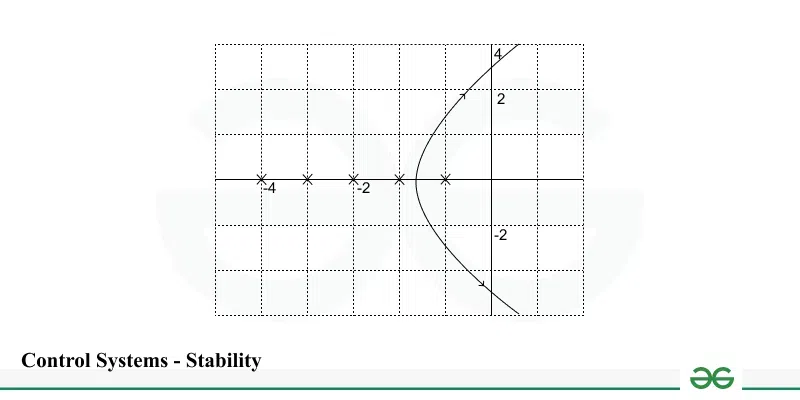
Корневой локусный график
Решение:

Из графика видно, что при низких значениях коэффициента усиления 'k' система стабильна, поскольку график корневого годографа находится на левой стороне плоскости. Но когда мы переходим к более высокому значению коэффициента усиления 'k', график смещается к правой стороне плоскости и, следовательно, становится нестабильным.


Участок Боде
Диаграммы Боде описывают частотную характеристику линейных систем, не зависящих от времени (изменение амплитуды и фазы в зависимости от частоты). Они помогают анализировать устойчивость системы управления. Они применяются к минимальной фазовой передаточной функции, т.е. (полюса и нули должны находиться в левой половине s-плоскости).

Устойчивость по графику Боде:

 ωpc > ωgc ->Система стабильна



 ωpc < ωgc ->Система нестабильна



ωpc = ωgc ->Система минимально устойчива



Где «w pc » — частота перехода усиления, а «w pc » — частота перехода фазы.



Частота кроссовера усиления:  это частота, на которой величина G(s) H(s) равна единице.

|G(jω)H(jω)| ω=ωgc  = 1



Частота пересечения фаз: это частота, на которой фазовый угол G(s) H(s) равен -180 градусов.

∠G(jω)H(jω)∣ ω=ωpc = -180 ∘





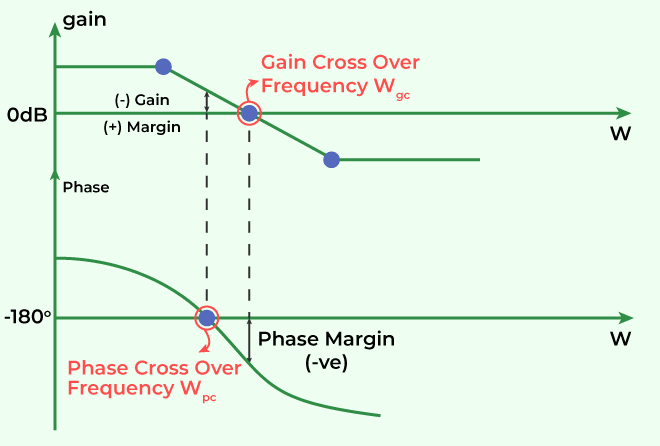
Параметры диаграммы Боде


Решение

На рисунке выше показан график усиления и фазы. Частоту кроссовера усиления (w pc ) и частоту кроссовера фазы (w pc ) можно рассчитать с помощью графика усиления и графика фазы соответственно.

W gc  — это значение при 0 дБ, тогда как W pc  — это значение при -180 o .

Здесь ωpc < ωgc. Это означает, что система неустойчива.

Применение систем управления - Устойчивость


Стабильность системы управления важна в аэрокосмической отрасли для обеспечения устойчивости самолетов и ракет, что помогает поддерживать желаемые характеристики с точной выработкой и стабильностью полета.
В автомобильной промышленности стабильность системы управления важна для стабильности работы электроусилителя руля (ESC), антиблокировочной системы тормозов и высокоточной активной подвески.
Он находит свое применение в секторе энергосистем для поддержания стабильности электрических сетей и предотвращения отключений электроэнергии.
Преимущества и недостатки систем управления - Устойчивость
Преимущества и недостатки стабильности приведены ниже:

Преимущества


Система управления с открытым контуром очень проста по своей конструкции, что делает ее экономичной.

Системы с замкнутым контуром более точны и аккуратны по сравнению с системами с разомкнутым контуром из-за их сложной структуры. Они также могут обрабатывать нелинейность.

Системы управления также устраняют ошибки в сигналах, что приводит к снижению уровня шума.
Замкнутые системы управления способны контролировать внешние факторы, что делает их более стабильными и надежными.
Замкнутые системы более ресурсоэффективны.
Недостатки
Системы открытого контура не имеют механизма обратной связи, что делает их крайне неточными и ненадежными для выходных данных.
Разомкнутые системы не способны устранить помехи, возникающие из-за внешних факторов.
Система управления требует точной интеграции и настройки, что является сложной задачей.
В замкнутой системе управления могут возникать колебания, приводящие к неустойчивости.



Устойчивость имеет решающее значение для любой динамической системы для правильного функционирования. Существуют различные методы, с помощью которых мы можем определить устойчивость системы, которая обсуждается в статье. Мы также изучили ее применение, преимущества и недостатки для лучшего понимания концепции. Это показывает, что если выход контролируется, то мы можем сказать, что система устойчива, или если в передаточной функции разомкнутого контура любые два полюса присутствуют на мнимой оси, то система считается устойчивой.

Часто задаваемые вопросы о системах управления


Каким образом обратная связь обеспечивает стабильность системы?


Системы обратной связи корректируют поведение системы в соответствии с выходом. Обычно отрицательная обратная связь обеспечивает стабильность системы.



Может ли стабильная система стать нестабильной при определенных условиях?


Да, стабильная система может стать нестабильной при некоторых особых условиях. Такие условия — высокий коэффициент усиления и неправильная конфигурация контроллера.



# итмошное решение

In [1]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [3]:
numerator = [1,1];
denominator = [1,2,1,1];
W = tf(numerator,denominator)
W

TransferFunction(array([1, 1]), array([1, 2, 1, 1]))

In [4]:
""" Найдем полюса и нули передаточной функции с использованием команд pole, zero"""
print('Передаточная функция САУ : \n %s'%W)
print("Полюса: \n %s"%pole(W))
print("Нули:\n %s -\n "%zero(W))

Передаточная функция САУ : 
 <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       s + 1
-------------------
s^3 + 2 s^2 + s + 1

Полюса: 
 [-1.75487767+0.j         -0.12256117+0.74486177j -0.12256117-0.74486177j]
Нули:
 [-1.+0.j] -
 


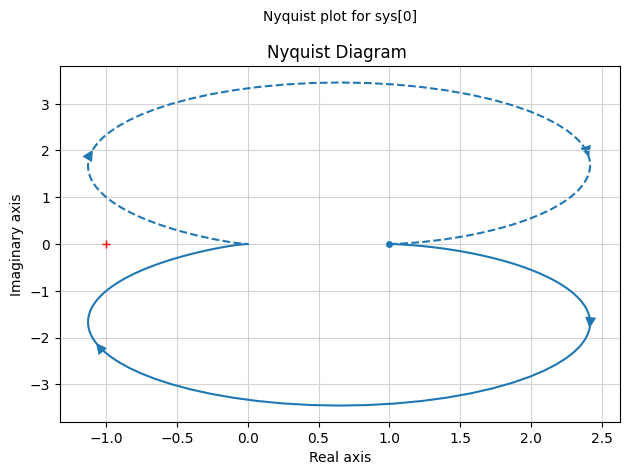

In [8]:
# Частотный годограф Найквиста
plt.title('Nyquist Diagram ')
plt.ylabel('Imaginary Axis')
plt.xlabel('Real Axis')
nyquist(W)
plt.grid(True)
plt.plot()
plt.show()


Непрерывная модель: 
 <StateSpace>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-3. -2.]]

B = [[0.]
     [1.]]

C = [[4. 2.]]

D = [[0.]]

Передаточная функция: 
 <TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2 s + 4
-------------
s^2 + 2 s + 3



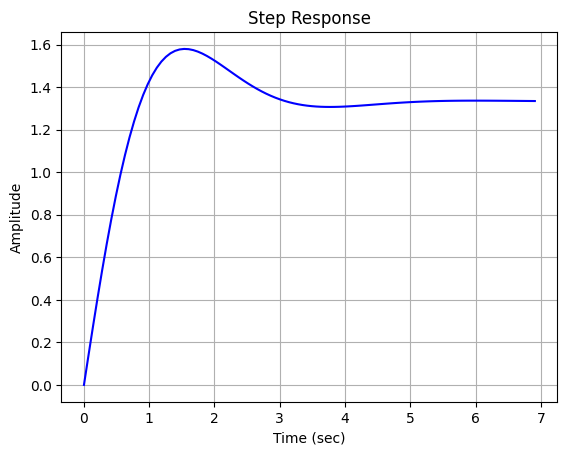

Дискретная модель: 
 <StateSpace>: sys[10]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.98598655  0.09018243]
     [-0.27054729  0.80562168]]

B = [[0.00467115]
     [0.09018243]]

C = [[4. 2.]]

D = [[0.]]

dt = 0.1



In [9]:
# Определение матриц системы
A = np.matrix([[0, 1], [-3, -2]])
B = np.matrix([[0], [1]])
C = np.matrix([[4, 2]])
D = 0

# Создание модели состояния
sn = ss(A, B, C, D)
wd = tf(sn)

# Вывод непрерывной модели и передаточной функции
print("Непрерывная модель: \n", sn)
print("Передаточная функция: \n", wd)

# Переходная функция
y, x = step(wd)
plt.plot(x, y, "b")
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.grid(True)
plt.show()

# Преобразование в дискретную модель с шагом дискретизации h = 0.1
h = 0.1
sd = c2d(sn, h)
print("Дискретная модель: \n", sd)

In [10]:
from control.matlab import *

# Проверка управляемости
controllability_matrix = ctrb(A, B)
rank_controllability = np.linalg.matrix_rank(controllability_matrix)
is_controllable = rank_controllability == A.shape[0]

# Проверка наблюдаемости
observability_matrix = obsv(A, C)
rank_observability = np.linalg.matrix_rank(observability_matrix)
is_observable = rank_observability == A.shape[0]

# Вывод результатов
print("Матрица управляемости:")
print(controllability_matrix)
print(f"Ранг матрицы управляемости: {rank_controllability}")
print(f"Система управляемая: {is_controllable}")

print("\nМатрица наблюдаемости:")
print(observability_matrix)
print(f"Ранг матрицы наблюдаемости: {rank_observability}")
print(f"Система наблюдаемая: {is_observable}")


Матрица управляемости:
[[ 0.  1.]
 [ 1. -2.]]
Ранг матрицы управляемости: 2
Система управляемая: True

Матрица наблюдаемости:
[[ 4.  2.]
 [-6.  0.]]
Ранг матрицы наблюдаемости: 2
Система наблюдаемая: True


Полюсы дискретной системы: [0.89580411+0.12753722j 0.89580411-0.12753722j]
Дискретная система устойчива: True


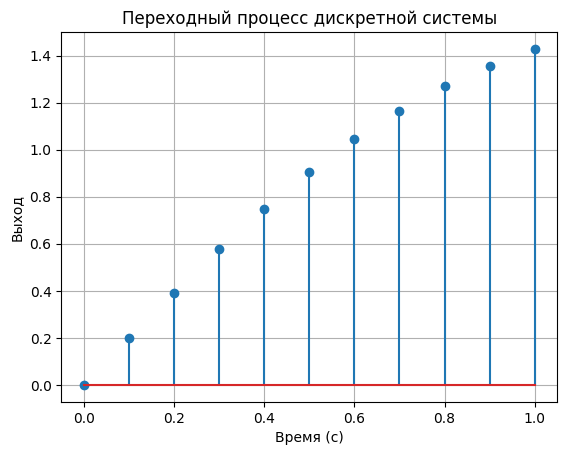

In [12]:
import control as ctrl

# Преобразование дискретной передаточной функции в состояние
Gd_ss = ctrl.ss(sd)

# Оценка устойчивости дискретной системы
poles_d = np.linalg.eigvals(sd.A)
print("Полюсы дискретной системы:", poles_d)
print("Дискретная система устойчива:", np.all(np.abs(poles_d) < 1))

# Переходный процесс дискретной системы
T = np.arange(0, 1 + 0.1, 0.1)
_, yout = ctrl.forced_response(sd, T, np.ones_like(T))
plt.figure()
plt.stem(T, yout)
plt.title('Переходный процесс дискретной системы')
plt.xlabel('Время (с)')
plt.ylabel('Выход')
plt.grid()
plt.show()

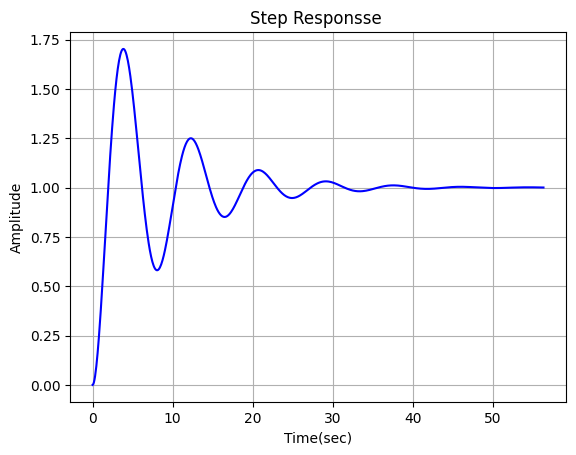

In [5]:
# Переходная функция
y,x=step(W)
plt.plot(x,y,"b")
plt.title('Step Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

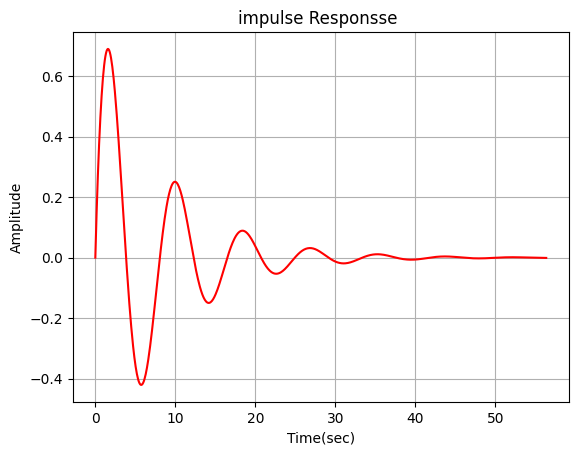

In [6]:
# Импульсная переходная функция
y,x=impulse(W)
plt.plot(x,y,"r")
plt.title('impulse Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


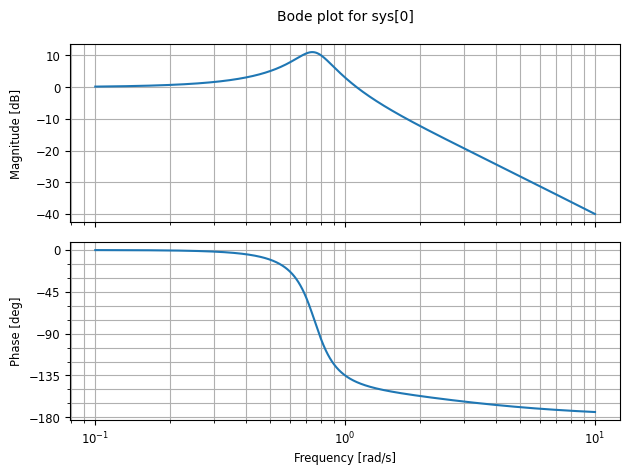

In [7]:
# Диаграмма Боде
mag, phase, omega = bode(W, dB=True)
plt.plot()
plt.show()